# **Image Classifier**
## **Author: Aadarsh Agarwal**

### Brief

In this project, I will perform image classification using four popular machine learning algorithms namely, Random Forest Classifier, KNN, Decision Tree Classifier, and Naive Bayes classifier. I'll provide the necessary explanation wherever needed. Let's start by directly jumping into implementation step-by-step.

### Agenda

In order to obtain meaningful results, a clearly outlined structure of how we will proceed is mentioned as follows.
1. Dataset Acquisition
1. Visualization
2. Dataset Pre-processing
3. Implementing a Random Forest Classifier
4. Implementing a KNN
5. Implementing a Decision Tree classifier
6. Implementing a Naive Bayes classifier
7. Results
8. Testing for Custom Input
9. Conclusion

### Dataset Acquisition

The dataset used here is the CIFAR-10 dataset. It is a Keras dataset and thus can be directly downloaded from here with a simple code. It consists of ten classes, namely, airplane, automobile, bird, cat, deer, dog, frog, horse, ship and  truck. Clearly, we will be working on a multi-class classification problem.

First, let’s import the required packages as follows:

In [6]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np

The dataset can be loaded using the code below:

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 888s 5us/step


#### Description

**x_train:** uint8 NumPy array of grayscale image data with shapes (50000, 32, 32, 3), containing the training data. Pixel values range from 0 to 255.

**y_train:** uint8 NumPy array of labels (integers in range 0-9) with shape (50000, 1) for the training data.

**x_test:** uint8 NumPy array of grayscale image data with shapes (10000, 32, 32, 3), containing the test data. Pixel values range from 0 to 255.

**y_test:** uint8 NumPy array of labels (integers in range 0-9) with shape (10000, 1) for the test data.

The classes for y_train and y_test are:

| Label | Description |
| ----------- | ----------- |
|0 | airplane |
|1 | automobile |
|2 | bird |
|3 | cat |
|4 | deer |
|5 | dog |
|6 | frog |
|7 | horse |
|8 | ship |
|9 | truck |

Further, we can confirm the size of the train and test datasets as shown below:

In [9]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

Thus, there is a total of 50,000 images for training and 10,000 images for testing. Besides, each of these images is of dimensions 32×32 and colour (rgb values are given for each pixel). The above details can be easily inferred from the shape returned.

**NOTE: Observe that there is no need for a train-test-split in this case as train and test sets can be directly obtained from Keras!**

### Visualization

Now that we have loaded the dataset, let us visualize the train data. To demonstrate, I'll be displaying only the first 100 images.

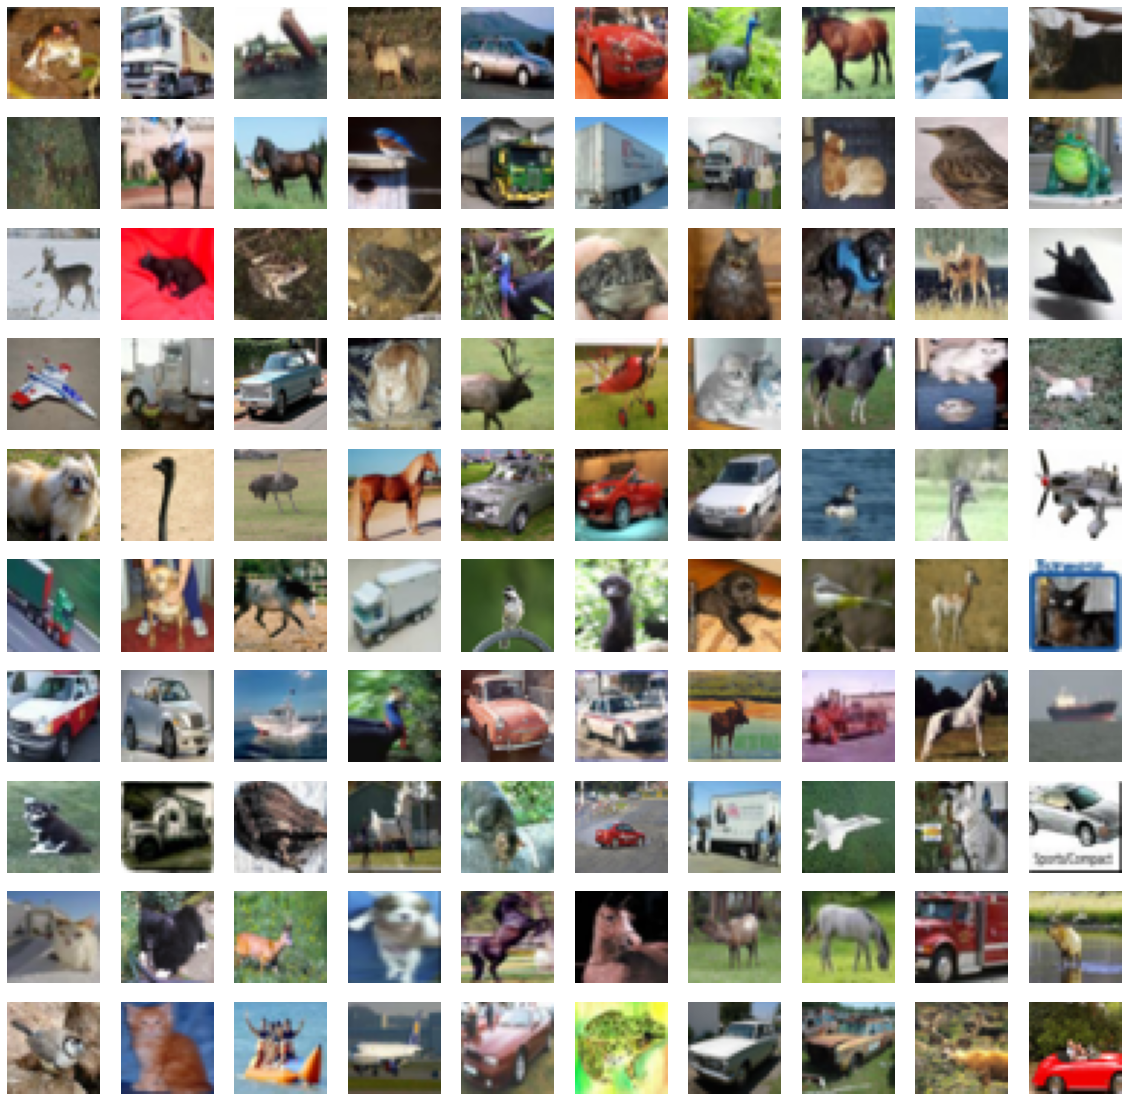

In [15]:
some_vehicles=x_train[:100]
fig, axis = plt.subplots(10, 10,figsize=(20,20))
c=0
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(some_vehicles[c])
        axis[i,j].axis('off')
        c+=1

plt.show()

### Dataset Pre-Processing

This step includes the normalization of images followed by their reshaping.

Normalization is a common step of image pre-processing and is achieved by simply dividing x_train by 255.0 for the train dataset and x_test by 255.0 for the test dataset. This is essential to maintain the pixels of all the images within a uniform range.

In [16]:
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

Now comes the most essential step of pre-processing, which is applicable only in this case as we aim to use machine learning for image classification. As we will be using the ML algorithms from sklearn, there is a need to reshape the images of the dataset to a two-dimensional array. This is because sklearn expects a 2D array as input to the fit() function which will be called on the model during training. Thus, the images of the test dataset should also be resized to 2D arrays as the model was trained with this input shape. 

The required code for the **train set** is as follows:

In [17]:
#sklearn expects input to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

The above code reshapes train set images from (50000,32,32,3) which is a 4D array to (50000,3072), a 2D array. 3072 is obtained by multiplying the dimensions of the image(32x32x3=3072).

The required code for the **test set** is given below:

In [18]:
#so, eventually, model.predict() should also be a 2d input
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))

Similarly, the images of the test set are reshaped from (10000,32,32,3) to (10000,3072).

### Implementing a Random Forest Classifier

#### Random Forest Classifier

Random forest is a supervised learning algorithm which is used for both classification as well as regression. But however, it is mainly used for classification problems. As we know that a forest is made up of trees and more trees means more robust forest. Similarly, random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result.

Let’s build a Random Forest Classifier to classify the CIFAR-10 images.
For this, we must first import it from sklearn:

In [63]:
from sklearn.ensemble import RandomForestClassifier

Create an instance of the RandomForestClassifier class:

In [69]:
model=RandomForestClassifier()

Finally, let us proceed to train the model:

In [70]:
model.fit(x_train2, np.ravel(y_train))

RandomForestClassifier()

**NOTE:** x_train2 is passed to fit() function as it is the reshaped 2D array of the images and sklearn needs a 2D array as input here. This is done while fitting for all the models as they are all implemented using sklearn.

#### Prediction

Now, predict for the test set using the fitted Random Forest Classifier model:

In [71]:
y_pred=model.predict(x_test2)
y_pred

array([6, 8, 8, ..., 3, 5, 7], dtype=uint8)

The model returns a number from 0 to 9 as the output. This can be clearly observed from the predictions displayed. These answers can be mapped to their corresponding classes with the help of the table given in the dataset description above.

#### Evaluation

Now, evaluate the model with the test images by obtaining its classification report, confusion matrix, and accuracy score.

In [72]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.57      0.55      0.56      1029
           1       0.57      0.52      0.54      1082
           2       0.33      0.38      0.36       872
           3       0.27      0.34      0.30       809
           4       0.41      0.41      0.41      1009
           5       0.39      0.41      0.40       941
           6       0.58      0.48      0.53      1205
           7       0.45      0.53      0.48       852
           8       0.62      0.59      0.60      1060
           9       0.54      0.47      0.50      1141

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.47     10000
weighted avg       0.48      0.47      0.48     10000



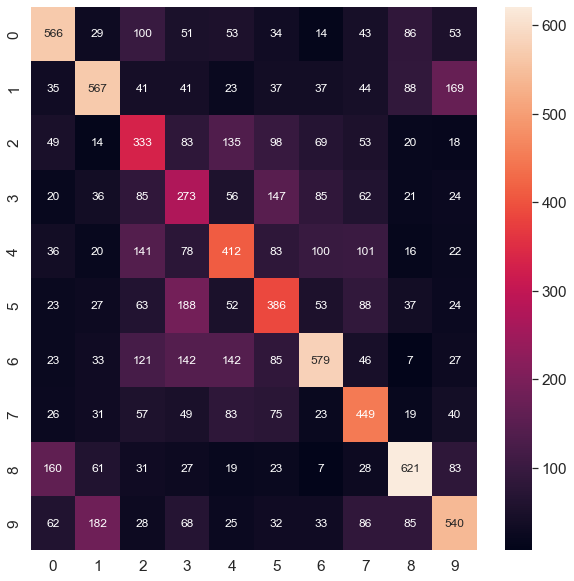

In [73]:
import seaborn as sn
import pandas as pd


plt.figure(figsize = (10,10))
df_cm = pd.DataFrame(confusion_matrix(y_pred,y_test), range(10), range(10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='g') # font size

plt.show()

Thus, Random Forest Classifier shows only **47%** accuracy on the test set.

### Implementing a KNN Classifier

#### KNN Classifier

K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry. The following two properties would define KNN well −

* **Lazy learning algorithm −** KNN is a lazy learning algorithm because it does not have a specialized training phase and uses all the data for training while classification.

* **Non-parametric learning algorithm −** KNN is also a non-parametric learning algorithm because it doesn’t assume anything about the underlying data.

It is implemented in sklearn using KNeighborsClassifier class. We begin by importing it:

In [41]:
from sklearn.neighbors import KNeighborsClassifier

and then instantiating it to create a KNN model:

In [51]:
knn=KNeighborsClassifier(n_neighbors=7)

I have chosen 7 neighbours randomly. Feel free to play with the number of neighbours to arrive at a better and thus optimal model.

Finally, train it:

In [52]:
knn.fit(x_train2,np.ravel(y_train))

KNeighborsClassifier(n_neighbors=7)

#### Prediction

Now, predict for the test set using the fitted KNN model:

In [53]:
y_pred_knn=knn.predict(x_test2)
y_pred_knn

array([2, 8, 8, ..., 5, 6, 4], dtype=uint8)

The predictions are outputs representing the classes as described in the previous algorithm.

#### Evaluation

Now, proceed to evaluate the KNN model just the way we evaluated our previous model.

In [54]:
accuracy_score(y_pred_knn,y_test)
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.52      0.40      0.45      1299
           1       0.20      0.70      0.30       280
           2       0.44      0.22      0.29      2013
           3       0.20      0.28      0.23       707
           4       0.52      0.23      0.32      2222
           5       0.20      0.40      0.27       504
           6       0.27      0.35      0.30       761
           7       0.20      0.70      0.31       281
           8       0.69      0.39      0.50      1749
           9       0.14      0.73      0.23       184

    accuracy                           0.34     10000
   macro avg       0.34      0.44      0.32     10000
weighted avg       0.45      0.34      0.35     10000



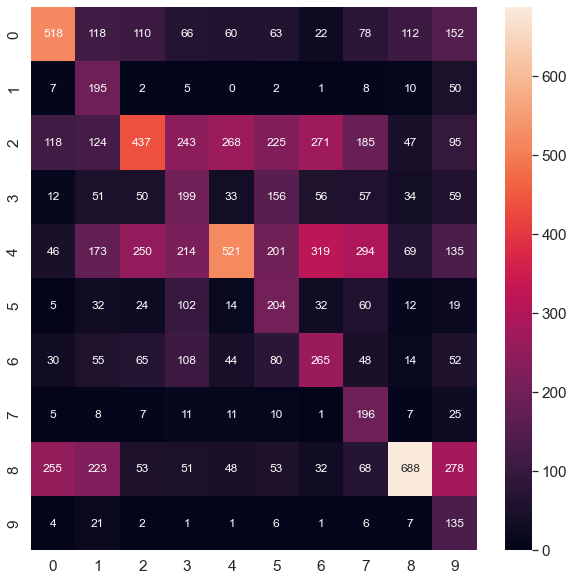

In [55]:
plt.figure(figsize = (10,10))
df_cm = pd.DataFrame(confusion_matrix(y_pred_knn,y_test), range(10), range(10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='g') # font size

plt.show()

Thus, KNN Classifier shows only **34%** accuracy on the test set.

### Implementing a Decision Tree

#### Decision Tree

In general, Decision tree analysis is a predictive modelling tool that can be applied across many areas. Decision trees can be constructed by an algorithmic approach that can split the dataset in different ways based on different conditions. Decisions tress are the most powerful algorithms that falls under the category of supervised algorithms.

They can be used for both classification and regression tasks. The two main entities of a tree are decision nodes, where the data is split and leaves, where we got outcome. We have the following two types of decision trees −

* **Classification decision trees** − In this kind of decision trees, the decision variable is categorical. The above decision tree is an example of classification decision tree.

* **Regression decision trees** − In this kind of decision trees, the decision variable is continuous.

It is implemented in sklearn using the DecisionTreeClassifier class. We begin by importing it:

In [57]:
from sklearn.tree import DecisionTreeClassifier

and then instantiating it to create a DecisionTreeClassifier model:

In [58]:
dtc=DecisionTreeClassifier()

Finally, train it:

In [59]:
dtc.fit(x_train2,y_train)

DecisionTreeClassifier()

#### Prediction

Now, predict for the test set using the fitted decision tree model:

In [60]:
y_pred_dtc=dtc.predict(x_test2)
y_pred_dtc

array([7, 9, 1, ..., 2, 2, 1], dtype=uint8)

The predictions are outputs representing the classes as described in the previous algorithm.

#### Evaluation

Now, proceed to evaluate the decision tree model just the way we evaluated our previous model.

In [61]:
accuracy_score(y_pred_dtc,y_test)
print(classification_report(y_pred_dtc,y_test))

              precision    recall  f1-score   support

           0       0.35      0.33      0.34      1064
           1       0.28      0.29      0.28       936
           2       0.22      0.20      0.21      1098
           3       0.17      0.18      0.18       947
           4       0.22      0.22      0.22       995
           5       0.22      0.23      0.22       973
           6       0.28      0.28      0.28       990
           7       0.27      0.28      0.27       931
           8       0.38      0.36      0.37      1043
           9       0.30      0.30      0.30      1023

    accuracy                           0.27     10000
   macro avg       0.27      0.27      0.27     10000
weighted avg       0.27      0.27      0.27     10000



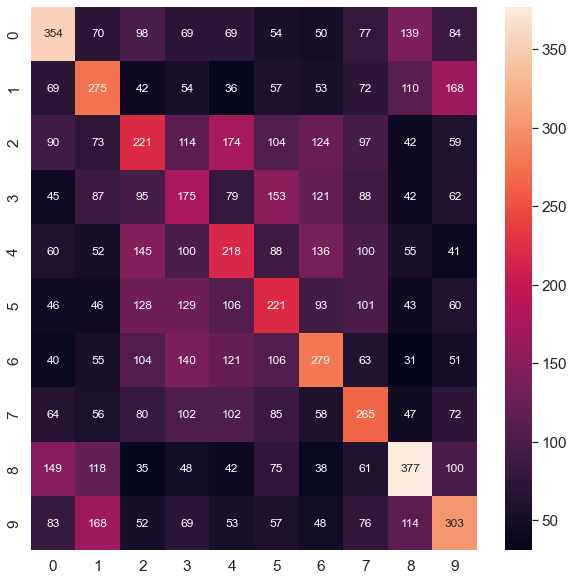

In [62]:
plt.figure(figsize = (10,10))
df_cm = pd.DataFrame(confusion_matrix(y_pred_dtc,y_test), range(10), range(10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='g') # font size

plt.show()

Thus, Decision Tree Classifier shows only **27%** accuracy on the test set.

### Implementing a Naive Bayes Classifier

#### Naive Bayes

Naïve Bayes algorithms is a classification technique based on applying Bayes’ theorem with a strong assumption that all the predictors are independent to each other. In simple words, the assumption is that the presence of a feature in a class is independent to the presence of any other feature in the same class. For example, a phone may be considered as smart if it is having touch screen, internet facility, good camera etc. Though all these features are dependent on each other, they contribute independently to the probability of that the phone is a smart phone.

In Bayesian classification, the main interest is to find the posterior probabilities i.e. the probability of a label given some observed features, 𝑃(𝐿 | 𝑓𝑒𝑎𝑡𝑢𝑟𝑒𝑠). With the help of Bayes theorem, we can express this in quantitative form as follows −

$$P(L |features)= \frac{P(L)P(features |L)}{𝑃(𝑓𝑒𝑎𝑡𝑢𝑟𝑒𝑠)}$$

It is implemented in sklearn using the GaussianNB class. We begin by importing it:

In [75]:
from sklearn.naive_bayes import GaussianNB

and then instantiating it to create an NB model:

In [76]:
nb=GaussianNB()

Finally, train it:

In [107]:
nb.fit(x_train2,np.ravel(y_train))

GaussianNB()

#### Prediction

Now, predict for the test set using the fitted NB model:

In [108]:
y_pred_nb=nb.predict(x_test2)
y_pred_nb

array([6, 8, 8, ..., 6, 5, 4], dtype=uint8)

The predictions are outputs representing the classes as described in the previous algorithm.

#### Evaluation

Now, proceed to evaluate the decision tree model just the way we evaluated our previous model.

In [109]:
accuracy_score(y_pred_nb,y_test)
print(classification_report(y_pred_nb,y_test))

              precision    recall  f1-score   support

           0       0.49      0.27      0.35      1817
           1       0.17      0.41      0.24       405
           2       0.08      0.19      0.12       443
           3       0.08      0.25      0.12       305
           4       0.42      0.24      0.30      1737
           5       0.26      0.31      0.29       840
           6       0.47      0.25      0.33      1846
           7       0.13      0.42      0.20       310
           8       0.47      0.39      0.42      1219
           9       0.41      0.38      0.39      1078

    accuracy                           0.30     10000
   macro avg       0.30      0.31      0.28     10000
weighted avg       0.39      0.30      0.32     10000



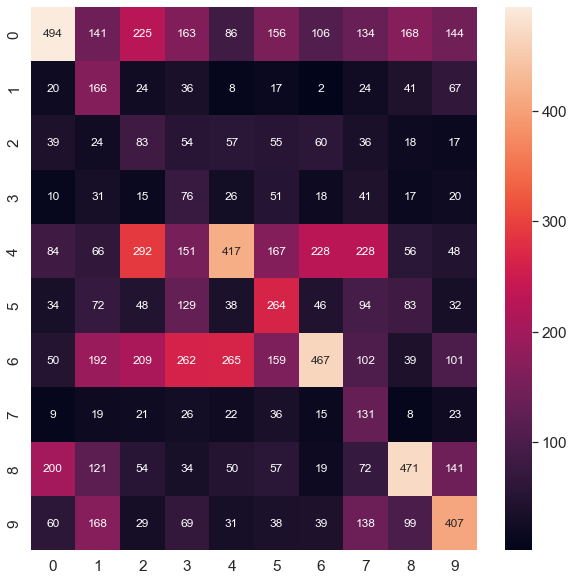

In [110]:
plt.figure(figsize = (10,10))
df_cm = pd.DataFrame(confusion_matrix(y_pred_nb,y_test), range(10), range(10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='g') # font size

plt.show()

Thus, the Naive Bayes Classifier shows only **30%** accuracy on the test set.

### Results

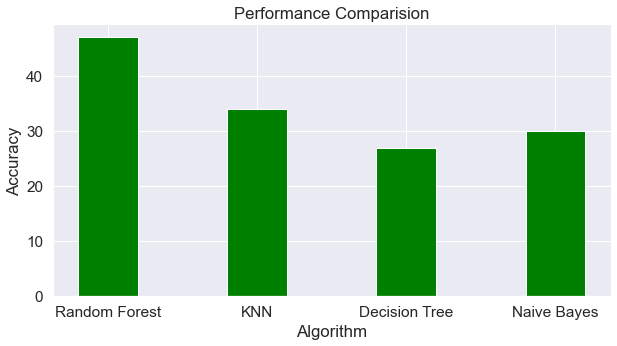

In [84]:
data = {'Random Forest':47, 'KNN':34, 'Decision Tree':27,
        'Naive Bayes':30}
models_used = list(data.keys())
accuracy = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models_used, accuracy, color ='green', width = 0.4)
 
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Performance Comparision")
plt.show()

The accuracies of the four ML algorithms, we just explored for our CIFAR-10 dataset, can be summarized using the graph shown above.

Random Forest Classifier shows the best performance with 47% accuracy followed by KNN with 34% accuracy, NB with 30% accuracy, and Decision Tree with 27% accuracy. Thus, Random Forest exhibits the best performance and Decision Tree the worst.

However, all the Machine learning algorithms perform poorly as indicated by the accuracies. The highest is just 47% while Deep learning algorithms outsmart them exceptionally with accuracies mostly exceeding 90%.

Although the accuracies obtained aren't high, still it helps provide a basic understanding of how different ML algorithms can be used for image classification in Python.

### Testing for Custom Input

From the above results, as RandomForestClassifier shows the best performance among all and a decent accuracy as well, let us choose this model.

Custom input refers to a single image that you want to pass to the model and test. Testing a model for a single input is widely used in various real-time applications. For instance, an individual’s photo is inputted into the system for face recognition.

I have used the following custom image to test my model:

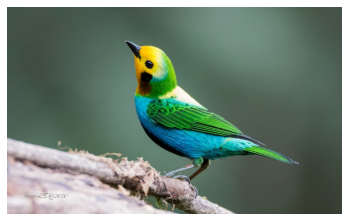

In [105]:
from skimage import io
image = io.imread('https://cdn.download.ams.birds.cornell.edu/api/v1/asset/202984001/1200')
plt.imshow(image)
plt.axis('off')
plt.show()

In [106]:
img_arr=cv2.resize(image,(32,32))

Now, reshape the image to 2D as discussed in the pre-processing section:

In [113]:
#so,eventually,model.predict() should also be a 2d input
nx, ny, nrgb = img_arr.shape
img_arr = img_arr/255.0
img_arr2 = img_arr.reshape(1,(nx*ny*nrgb))

Let us declare a list called classes:

In [114]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

It has all ten categories. The output of the model, as discussed earlier, will be from 0 to 9 and the corresponding class can be retrieved from the above list.

Finally, pass the required array to the Random forest classifier using the predict() function.

In [115]:
ans=model.predict(img_arr2)
print(classes[ans[0]])
#RandomForestClassifier

bird


The answer variable is a list having only one number which is the index of the classes list. The category at this index is the predicted class.

The model predicts it to be a bird which is right! But, it predicts incorrectly for a few test images. The drawback can be overcome by building a CNN or ANN model instead.

### Conclusion

Thus, we discussed how to use image classification in Machine Learning by implementing four common ML algorithms including Random Forest, KNN, Decision Tree, and Naive Bayes classifier. Due to their poor accuracies, Deep learning is preferred for image classification tasks. However, implementation of these ML algorithms still provide an insight into how image classification is carried out.